 ## Title Heart Disease Predmiction  
 'Author :' [Waseem Hassan ] (https://github.com/Waseem771/Project_ML) \
 'Kagle account: '  [''Waseem Hassan] (https://www.kaggle.com/waseem7711) \  
 'Date :' 09-3-2024  \
 'Data Set:' ['Heart Disease UCI'] (https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data) 

## Meta Data 

## About Dataset
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
### Column Descriptions:
`id` (Unique id for each patient) \
`age` (Age of the patient in years) \
`origin` (place of study) \
`sex` (Male/Female) \
`cp` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic]) \
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital)) \ 
`chol` (serum cholesterol in mg/dl) \
`fbs` (if fasting blood sugar > 120 mg/dl) \
`restecg` (resting electrocardiographic results) \
`-- Values:` [normal, stt abnormality, lv hypertrophy] \
### thalach: maximum heart rate achieved
`exang:` exercise-induced angina (True/ False) \
`oldpeak:` ST depression induced by exercise relative to rest \
`'slope:`' the slope of the peak exercise ST segment \
`ca:` number of major vessels (0-3) colored by fluoroscopy \
`thal:` [normal; fixed defect; reversible defect] \
`num: `the predicted attribute 
Acknowledgements
#### Creators:
Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
##### Relevant Papers:
Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
Web Link
David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. Web Link
### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aim and Objects 
We will fill this after perform the exploratory data analysis and visuilization data.

In [1]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

## Load the data set 

In [2]:
## way_1 

# load the data set from csv file placed locally in our pc 

df = pd.read_csv('D:\\Data Science & AI Mentorship Program\\six-months_python_for_data_science-mentorship-program-main\\07_machine_learning\\Projects_ML\\01_Project_ML_Heart_Disease\\heart_disease_uci.csv')


In [3]:
##  Look five rows of the data

df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory the Data Analysis (EDA)

### Explore each column 


In [4]:
# exploring the datatype of each column 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
##  data shape 

df.shape

(920, 16)

In [6]:
# id columns
df['age'].min(), df['age'].max()


(28, 77)

<Axes: xlabel='age', ylabel='Count'>

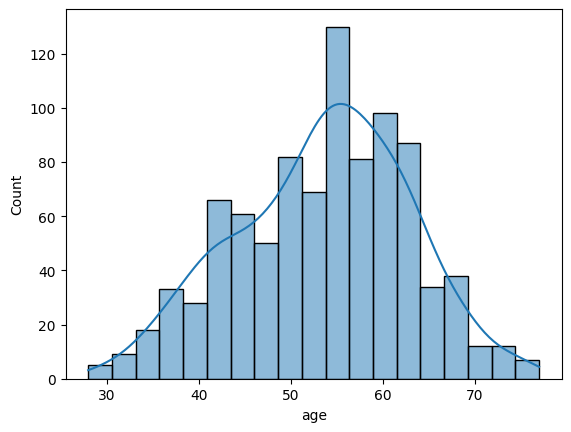

In [7]:
# draw the distribution of histogram for the age column
sns.histplot(df['age'], kde=True)


Mean: 53.51086956521739
Median: 54.0
Mode: 54


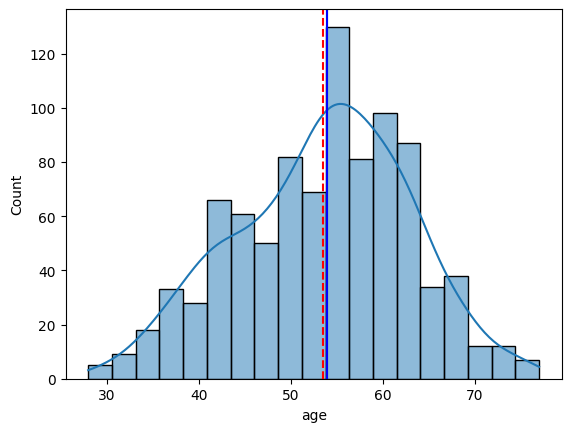

In [8]:
# plot the mean, median , mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='r', linestyle='--')
plt.axvline(df['age'].median(), color='g', linestyle='-')
plt.axvline(df['age'].mode()[0], color='b', linestyle='-')


# print the values of mean, median, mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])



In [9]:
pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.


In [11]:
## lets explore of histogram of age column by using  gender based distribution using plotly and coloring the heart disease by sex 


fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()




In [12]:
# find the values count the  age column grouping by sex column 
df['age'].value_counts()

age
54    51
58    43
55    41
56    38
57    38
52    36
62    35
51    35
59    35
53    33
60    32
61    31
48    31
63    30
50    25
41    24
46    24
43    24
64    22
49    22
65    21
44    19
47    19
45    18
42    18
38    16
67    15
39    15
69    13
40    13
66    13
35    11
37    11
68    10
34     7
70     7
74     7
36     6
32     5
71     5
72     4
29     3
75     3
31     2
33     2
76     2
77     2
30     1
28     1
73     1
Name: count, dtype: int64

In [13]:
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

In [14]:
# find the values of sex columns 
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [15]:
## Percentages of male and female of the heart disease effected patients 
male_count = 726
female_count = 194
total_count = male_count + female_count
male_percentage = (male_count / (total_count)) * 100
female_percentage = (female_count / (total_count)) * 100

##  display the results

print(f"Male percentage of patients: {male_percentage:.2f}")
print(f"Female percentage of patients: {female_percentage:.2f}")


Male percentage of patients: 78.91
Female percentage of patients: 21.09


In [16]:
df['dataset'] .value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

<Axes: xlabel='dataset', ylabel='count'>

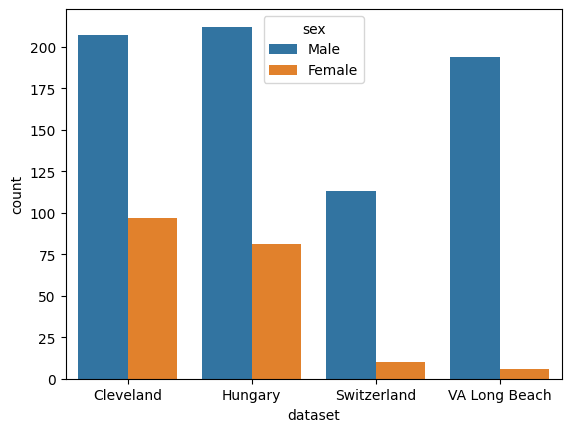

In [17]:
# plot the countplot of dataset column 
sns.countplot(data=df, x='dataset', hue='sex')

In [18]:
# Convert 'dataset' column to string type
df['dataset'] = df['dataset'].astype(str)

# Plot the bar plot
fig = px.bar(df, x='dataset', color='sex')
fig.show()

In [19]:
# print the values count from dataset column groupby sex 
print(df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [20]:
import plotly.express as px

In [21]:
## Make the plot of age column using plotly and coloring this by data set column 
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

In [22]:
## print the mean , median , mode of age column group by dataset column 
print(f"Mean of the Data Set : {df.groupby('dataset')['age'].mean()}")
print(f"Median of the Data set : {df.groupby('dataset')['age'].median()}")
print(f"Mode of the dataset : {df.groupby('dataset')['age'].agg(pd.Series.mode)}")



Mean of the Data Set : dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
Median of the Data set : dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
Mode of the dataset : dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


#### lets Explore the CP (Chest pain ) column:

In [23]:
# value counts of cp counts 
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [24]:
# draw the plot of age column grouped by cp column using plotly 

fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()


<Axes: xlabel='cp', ylabel='count'>

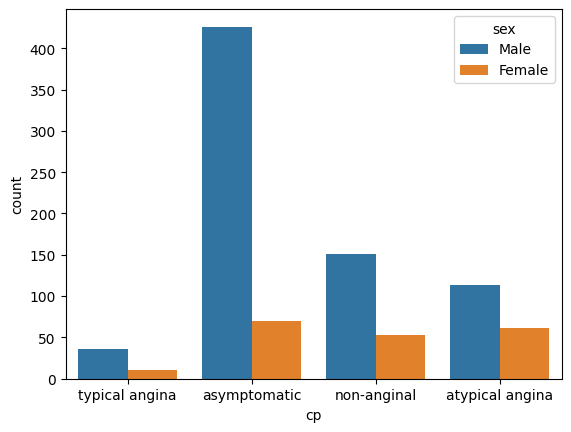

In [25]:
## count plot of cp  column by sex column 
sns.countplot(df, x='cp', hue='sex')

<Axes: xlabel='cp', ylabel='count'>

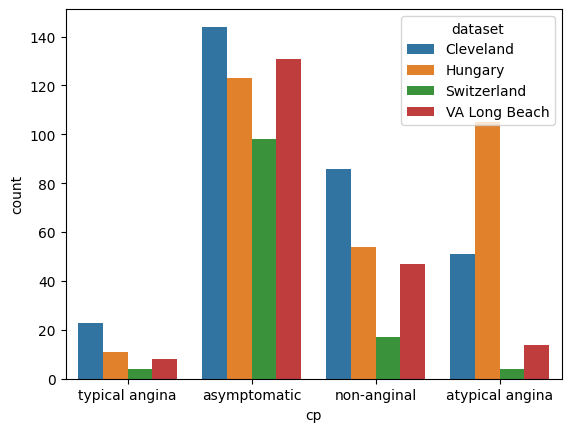

In [26]:
## count plot the cp column by dataset 
sns.countplot(df, x='cp', hue='dataset')

In [27]:
## age base we draw the countplot 

fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

#### Lets explore the therest (resting blood pressure ) column :

The normal resting blood pressure is 12/80  mm Hg.
`Write here what will happen if the blood pressure is high or low and then you bin the data based on those values.


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [29]:
## We have the values counts of therest bps column 

df['trestbps'].describe()


count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

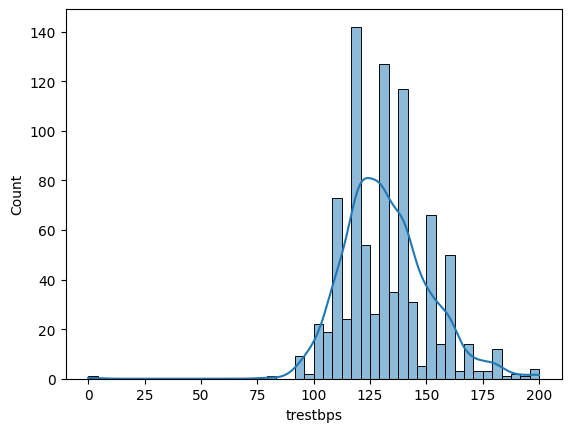

In [30]:
sns.histplot(df['trestbps'], kde=True)

In [31]:
## deal with missing values in trest column 
# find the percentage of missing values in trestbps column 

print(f"Percentage of Missing values in trestbps column : {df['trestbps'].isnull().sum() / len(df) * 100:.2f}%")
     

Percentage of Missing values in trestbps column : 6.41%


In [32]:
## impute the missing values in trestbps column using iterative imputer

# create an object of iterative imputers 
imputer = IterativeImputer(max_iter=10, random_state=42)

# fit the imputer on trestbps column 
imputer.fit(df[['trestbps']])

# transform the trestbps column
df['trestbps'] = imputer.transform(df[['trestbps']])

## check the missing values in trestbps column 
print(f"Missing values in trestbps column : {df['trestbps'].isnull().sum()}")





Missing values in trestbps column : 0


In [33]:
### Lets impute other column with missing values 

print(f"Missing values in columns ")
(df.isnull().sum() /len(df) * 100).sort_values(ascending=False)

Missing values in columns 


ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
num          0.000000
dtype: float64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [35]:
# create an object of iterative imputer
imputer_2 = IterativeImputer(max_iter=10, random_state=42)

# fit and transform the imputer on ca, oldpeak, thalch, chol, thal columns
df[['ca', 'oldpeak', 'thalch', 'chol']] = imputer_2.fit_transform(df[['ca', 'oldpeak', 'thalch', 'chol']])




In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     611 non-null    object 
 13  ca        920 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [37]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
thalch       0.000000
oldpeak      0.000000
ca           0.000000
num          0.000000
dtype: float64

##lets impute the missing values in thal columns 


In [38]:
print(f"The missing values in thal column in dataset : {df['thal'].isnull().sum()}")


The missing values in thal column in dataset : 486


In [39]:
df['thal'].isnull().sum()


486

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     611 non-null    object 
 13  ca        920 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


## Dealing with Missing Values 

We are going to make function deal with missing values 

In [41]:
df.isnull().sum()[df.isnull().sum() > 0] .sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index
missing_data_cols


Index(['fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [42]:
categorical_cols = ['thal' , 'ca', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex', 'num']
bol_cols = ['fbs', 'exang']
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

In [43]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [44]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

thal       486
slope      309
fbs         90
exang       55
restecg      2
dtype: int64

In [45]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    elif col in bol_cols:
        df[col] = impute_continuous_missing_data(col)
        
    else:
        pass

Missing Values fbs : 9.78%


NameError: name 'bool_cols' is not defined

In [ ]:
# bool_cols = ['fbs', 'exang']


In [ ]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

## Dealing with outliers 

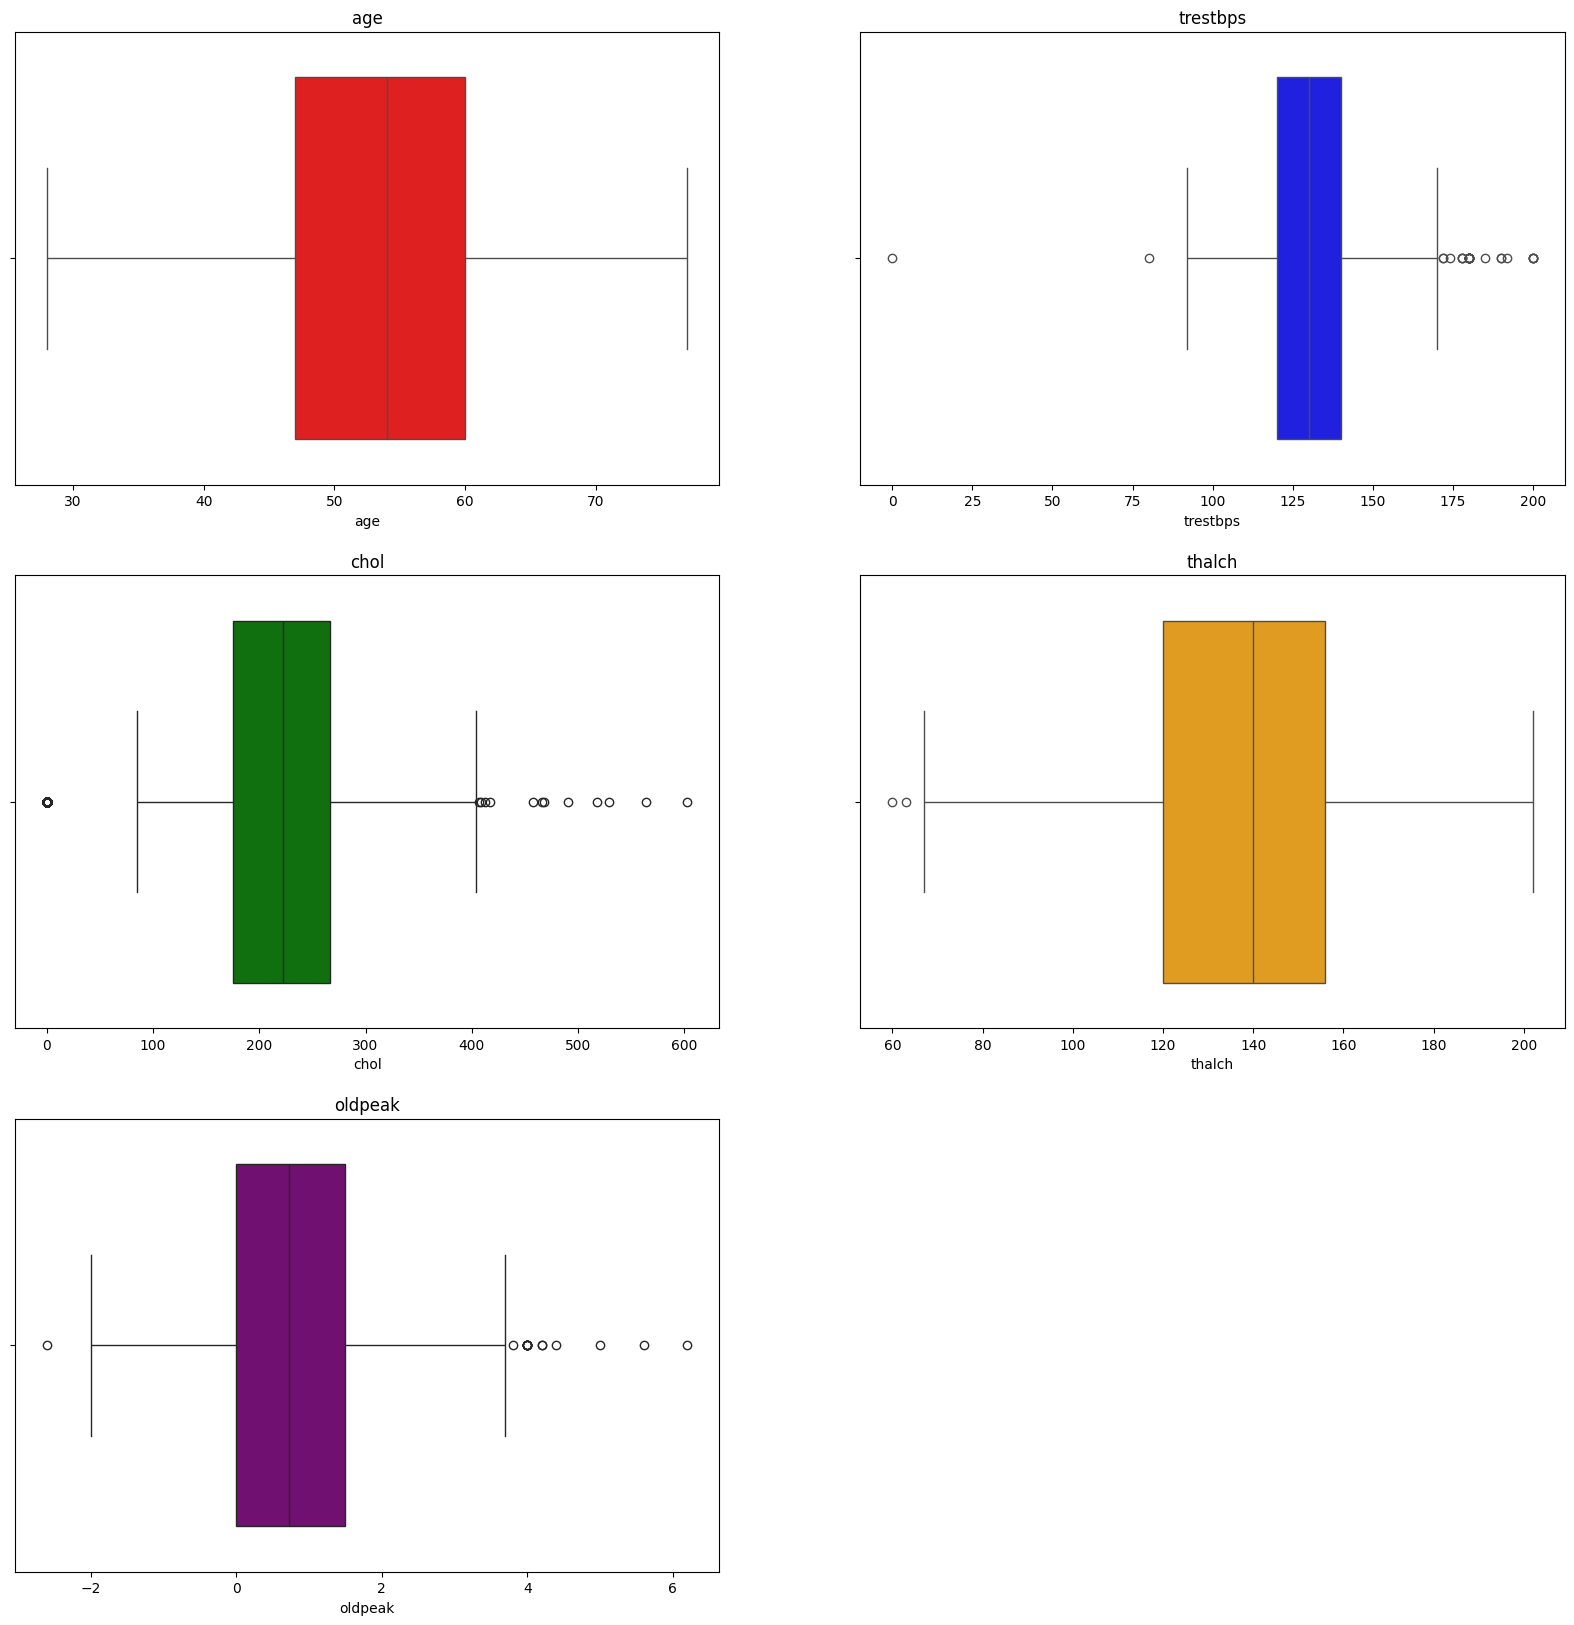

In [ ]:
plt.figure(figsize=(20, 20))
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined your DataFrame 'df' and list of numeric columns 'numeric_cols'
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Define your colors list

for i, col in enumerate(numeric_cols):
    if i < len(colors):  # Check if i is within the range of colors list
        plt.subplot(3, 2, i+1)
        sns.boxplot(x=df[col], color=colors[i])
        plt.title(col)
    else:
        break  # Exit the loop if there are no more colors available
plt.show()

In [ ]:
# make the box plot for all numeric columns using loops and plotly 
fig = px.box(data_frame=df, y='age')
fig.show()

fig  = px.box(data_frame=df, y='trestbps')
fig.show()
fig = px.box(data_frame=df, y='chol')
fig.show()
fig = px.box(data_frame=df, y='thalch')
fig.show()

In [ ]:
# print the rows from df where trestbps value is 0
df[df['trestbps']== 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,0.438714,reversable defect,3


In [ ]:
# remove the this rows from data 
df = df[df['trestbps'] != 0]
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# make the box plots for all the numeric columns using loops and plotly 
fig = px.box(df, y=numeric_cols)
fig.show()

In [46]:
df = df[df['chol'] == 0]


In [47]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,Male,Switzerland,typical angina,95.000000,0.0,NaN,normal,127.0,False,0.700000,upsloping,0.585346,NaN,1
598,599,34,Male,Switzerland,asymptomatic,115.000000,0.0,NaN,NaN,154.0,False,0.200000,upsloping,0.283606,NaN,1
599,600,35,Male,Switzerland,asymptomatic,132.132404,0.0,NaN,normal,130.0,True,0.757452,NaN,0.566071,reversable defect,3
600,601,36,Male,Switzerland,asymptomatic,110.000000,0.0,NaN,normal,125.0,True,1.000000,flat,0.640861,fixed defect,1
601,602,38,Female,Switzerland,asymptomatic,105.000000,0.0,NaN,normal,166.0,False,2.800000,upsloping,0.505422,NaN,2


## Machine learning 

In [48]:

df['num'].value_counts()

num
1    62
2    46
3    38
0    20
4     6
Name: count, dtype: int64

 The Target Column is num which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.

    0 = no heart disease
    1 = mild heart disease
    2 = moderate heart disease 
    3 = severe heart disease
    4 = critical heart disease 

In [49]:
# split the data into X and y
X = df.drop('num', axis=1)
y = df['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 Enlist all the models that you will use to predict the heart disease. These models should be classifiers for multi-class classification.

    1. logistic regression
    2.KNN
    3.NB
    4.SVM
    5.Decision Tree
    6.Random Forest
    7.XGBoost
    8.GradientBoosting
    9.AdaBoost
    10.lightGBM

In [50]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# from lightgbm import LGBMClassifier

# impot pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

# save the best model
import pickle
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))

Model: Random Forest
Cross-validation Accuracy: 0.375
Test Accuracy: 0.28846153846153844

Model: Gradient Boosting
Cross-validation Accuracy: 0.4
Test Accuracy: 0.2692307692307692

Model: Support Vector Machine
Cross-validation Accuracy: 0.4166666666666667
Test Accuracy: 0.23076923076923078

Model: Logistic Regression
Cross-validation Accuracy: 0.35
Test Accuracy: 0.23076923076923078

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.4083333333333333
Test Accuracy: 0.3076923076923077

Model: Decision Tree
Cross-validation Accuracy: 0.31666666666666665
Test Accuracy: 0.40384615384615385

Model: Ada Boost
Cross-validation Accuracy: 0.4583333333333333
Test Accuracy: 0.38461538461538464

Model: XG Boost
Cross-validation Accuracy: 0.36666666666666664
Test Accuracy: 0.3076923076923077

Model: Naive Bayes
Cross-validation Accuracy: 0.275
Test Accuracy: 0.19230769230769232

Best Model: Pipeline(steps=[('model', DecisionTreeClassifier(random_state=42))])


####  Outputs: 

1. The minimum age to have a heart disease  starts from 28 years old
2. The maximum age to have a heart disease is 77 years old
3. Most of the males and females are in heart disease with the age of 54-55 years old.
4. Female percentage in the data : 21.91%
5. Male percentage of peoples in data set is 78.09%
6.Male are 274.23 % more than females in data.
7. We have highest number of peoples from cleveland (304), and lowest from switzerland (123)
    1. The number of highest number of females in data set from cleveland is (97) and lowest from VA long beach (6)
    2. The Heighest numner of males are from hungry is (202) and lowest from switzerland is (113)
8. `write down the observation here the about mean , median and mode fo the age column from dataset `
9. `Write down the observation of cp column`
10. We have highest number of people from Cleveland (304) and lowest from Switzerland (123).
11. The highest number of females in this dataset are from Cleveland (97) and lowest from VA Long Beach (6).
12. The highest number of males in this dataset are from Hungary (212) and lowest from Switzerland (113).
14. Write down the observations here about mean, median and mode of age column, grouped by dataset column.
15. Write down the observation from cp column here.
16. Write down the steps of Imputing missingvalues and why did you choose those steps?
17. How did you deal with outliers, write the information Step by Step.
18. Explore all other columns and write their outputs.
19. write down the observations from model output.
     
    
    



